[View in Colaboratory](https://colab.research.google.com/github/restrepo/tmp/blob/master/DM/WIMP_Freeze_out.ipynb)

# Dark Matter Boltzmann equation

This program is made to reproduce the behavior of dark matter yield in WIMP and FIMP frameworks based on Chapter 5th, Kolb Turner (Early Universe)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
from numpy import arange
import scipy 
import scipy.integrate as integrate
from scipy.integrate import odeint

In [0]:
# parameters

Ms = 100                                #GeV Singlet Mass
Mp = 1.22e19                            #GeV Planck Mass
g = 100                                 # Degrees of freedom
gs = 106.75                             # Entropy degrees of freedom
H0 = 2.133*(0.7)*1e-42                   # GeV Hubble parameter (unused)

## Equilibrium distribution

Here we consider thermal production of dark matter particles.
The equilibrium distribution of this particles is consider for the non-relativistic case, as follows (see eq 5.25):

$$Y_{EQ}(x) = \frac{45}{2\pi^{4}}\frac{g}{g_{*s}} x^{3/2} e^{-x} = 0.145\frac{g}{g_{*s}} x^{3/2} e^{-x}\,, $$

where $x = M / T$ and $M= 100$ GeV is the singlet mass taken as constant.

In [0]:
#  Equilibrium distribution test


def Yeq(x):
    return 0.145*(g/gs)*(x)**(3/2)*np.exp(-x)

xi=1E-4
xe=1000
npts=3000
# For several order of magnitude: 
x = np.linspace(0.01, 1000, 1000)

In [0]:
x=np.logspace( np.log10( xi) , np.log10( xe) ,npts  )

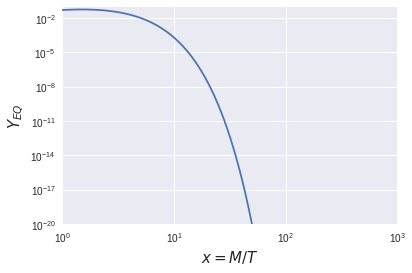

In [61]:
plt.loglog(x, Yeq(x))
plt.ylim(ymax=0.1,ymin=1e-20)
plt.xlim(xmax=1e3,xmin=1)
plt.xlabel('$x = M/T$', size= 15)
plt.ylabel('$Y_{EQ}$', size= 15)
plt.grid(True)

## Boltzmann equation

The general expresion for the thermal evolution of DM is as follows (see eq (5.26) Kolb and Turner ):

$$ \frac{x}{Y_{EQ}(x)}\frac{dY}{dx} =-\frac{n_{EQ}(x)\langle \sigma v \rangle}{H(x)}\left[\left(\frac{Y}{Y_{EQ}(x)}\right)^{2} - 1\right]\,, $$

donde
$$n_{EQ} (x)= 2\left( \frac{M^{2}}{2\pi x}\right)^{3/2} e^{-x}$$ 
and 
$$H(x) = 1.67 x^{-2} g_{*}^{1/2}\frac{M^{2}}{Mp}$$    see ( eq 5.16)

## WIMP 

The initial condition to solve the evolution equation is $Y(x_i) = Y_{EQ}$, where $x_i=0.01$, such that $T_i=M/x_i=10^4\ $GeV.

In [0]:
sigmav=[1.7475568196239999e-09,1.7475568196239999e-06]
def eqd(yl,x,Ms = 100,σv = sigmav[0]):
    '''
    Ms  [GeV]     : Singlet Mass
    σv: [1/GeV^2] : ⟨σv⟩
    '''
    
    Mp = 1.22e19                            
    g = 100                                 # Degrees of freedom
    gs = 106.75                             # Entropy degrees of freedom
    
    H = 1.67*g**(1/2)*Ms**2/Mp
    
    dyl = -2*(((Ms**2/(2*np.pi*x))**(3/2)*np.exp(-x))*σv/(x**(-2)*H*x))*(yl**2 - (0.145*(g/gs)*(x)**(3/2)*np.exp(-x))**2)
    
    return dyl
    
    

In [63]:
#Test the function
eqd(0.005,1)

14742851.795673216

In [0]:
#Condiciones iniciales

y0 = Yeq(x[0])

yl =  odeint( eqd, y0, x,args=(Ms,sigmav[0]) )
yl1 = odeint( eqd, y0, x,args=(Ms,sigmav[1]) )


The following plot can be find in the reference book (Figure 5.1)

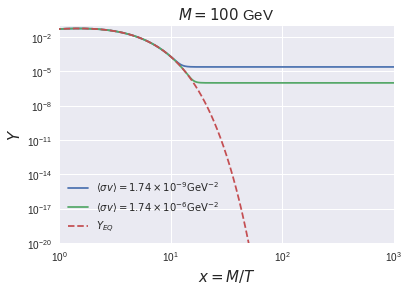

In [65]:
plt.loglog(x,yl, label = r'$\langle σ v\rangle = 1.74 \times 10^{-9} {\rm GeV}^{-2}$')
plt.loglog(x,yl1, label = r'$\langle σ v\rangle = 1.74 \times 10^{-6} {\rm GeV}^{-2}$')
plt.loglog(x,Yeq(x), '--', label = '$Y_{EQ}$')
plt.ylim(ymax=0.1,ymin=1e-20)
plt.xlim(xmax=1e3,xmin=1)
plt.xlabel('$x = M/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$M = 100$ GeV', size= 15)
plt.legend(loc='best',fontsize=10)
plt.grid(True)

## FIMP

For this framework the initial condition is $Y(T >> M)= 0$. From this, in the general evolution equation, the contribution of $Y$ is negligible so the term $Y/Y_{EQ} \sim 0$, so the equation turns into:

$$ \frac{dY}{dx} =\frac{\Gamma}{xH(x)}\left(Y_{EQ}(x) ^{2}\right)\,, $$

In [75]:
#Ms=1, 
def sv(λ,A=5.2e-32/1E-11**2):
    return A*λ**2
sv(1E-10)

5.2000000000000004e-30

In [0]:
y0=0
sigmav=[sv(1E-11),sv(1E-10)]
yl11 = odeint( eqd, y0, x,args=(1,sigmav[0]) )
yl12 = odeint( eqd, y0, x,args=(1,sigmav[1]) )

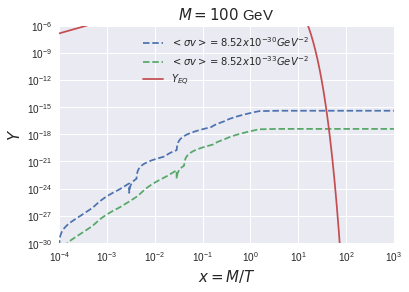

In [80]:
plt.loglog(x,yl12,'--', label = '$<σ v> = 8.52 x10^{-30} GeV^{-2}$' )
plt.loglog(x,yl11,'--', label = '$<σ v> = 8.52 x10^{-33}GeV^{-2}$')
plt.loglog(x,Yeq(x), label = '$Y_{EQ}$')
plt.ylim(ymax=1E-6,ymin=1e-30)
plt.xlim(xmax=1e3,xmin=xi)
plt.xlabel('$x = M/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$M = 100$ GeV', size= 15)
plt.legend(loc=0)
plt.grid(True)

In [0]:
def eqd1(y,x):
    yl11 = y[0]
    yl12 = y[1]
    
    Ms = 1                                  #GeV Singlet Mass
    Mp = 1.22e19                            #GeV Planck Mass
    g = 100                                 # Degrees of freedom
    gs = 106.75                             # Entropy degrees of freedom
    σv = 8.5246674128e-30
    σv1 = 8.5246674128e-33
    H = 1.67*g**(1/2)*Ms**2/Mp
    
    dyl11 = (((Ms**2/(2*np.pi*x))**(3/2)*np.exp(-x))*σv/(x**(-2)*H*x))*((0.145*(g/gs)*(x)**(3/2)*np.exp(-x))**2)
    dyl12 = (((Ms**2/(2*np.pi*x))**(3/2)*np.exp(-x))*σv1/(x**(-2)*H*x))*((0.145*(g/gs)*(x)**(3/2)*np.exp(-x))**2)
    
    return [dyl11,dyl12]

In [82]:
#Test
eqd1([0.005, 0.005],0.1)

[1.7090819740432404e-17, 1.7090819740432407e-20]

In [0]:
y0 = [0, 0]


y = odeint(eqd1, y0, x)

yl11 = y[:,0]
yl12 = y[:,1]

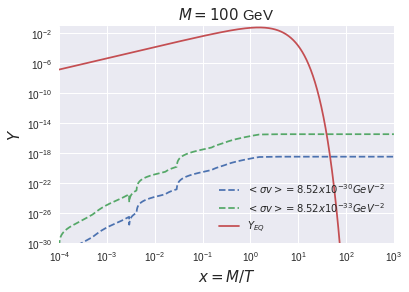

In [85]:
plt.loglog(x,yl12,'--', label = '$<σ v> = 8.52 x10^{-30} GeV^{-2}$' )
plt.loglog(x,yl11,'--', label = '$<σ v> = 8.52 x10^{-33}GeV^{-2}$')
plt.loglog(x,Yeq(x), label = '$Y_{EQ}$')
plt.ylim(ymax=0.1,ymin=1e-30)
plt.xlim(xmax=1e3,xmin=1E-4)
plt.xlabel('$x = M/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$M = 100$ GeV', size= 15)
plt.legend(loc=0)
plt.grid(True)

In [27]:
cmGv =(1 /(5.06e13)) #cm to GeV^-1
sGv = 6.58e-25 # s to GeV^-1
Gevm2 =  cmGv**3/sGv
Gevm2

1.1730662928837261e-17

In [28]:
1e-47*(1/Gevm2)

8.5246674128e-31

# Singlet scalar as FIMP Dark Matter
https://arxiv.org/abs/1105.1654

Now we reproduce figure 2 from the article above.
Following FIMP initial condition, we consider :

$$ \frac{dY}{dx} = \left(\frac{\pi g_{*}(T)}{45}\right)^{1/2} M_{p} \langle \sigma v\rangle Y_{EQ}(x)^{2}\,, $$

In [0]:
def eqd2(y,x):
    yl3 = y[0]
    yl33 = y[1]
    
    
    Ms = 1                                  #GeV Singlet Mass
    Mp = 1.22e19                            #GeV Planck Mass
    g = 100                                # Degrees of freedom
    gs = 107                             # Entropy degrees of freedom
    σv = 5.2e-32
    #σv1 = 8.5246674128e-33
    H = 1.67*g**(1/2)*Ms**2/Mp
    
    dyl3 = np.sqrt(np.pi*g/45)*Mp*σv*((0.145*(g/gs)*(x)**(3/2)*np.exp(-x))**2)
    dyl33 = (((Ms**2/(2*np.pi*x))**(3/2)*np.exp(-x))*σv/(x**(-2)*H*x))*((0.145*(g/gs)*(x)**(3/2)*np.exp(-x))**2)
    
    
    return [dyl3, dyl33]

In [0]:
y0 = [0.0, 0.0]


y = odeint(eqd2, y0, x)

yl3 = y[:,0]
yl33 = y[:,1]

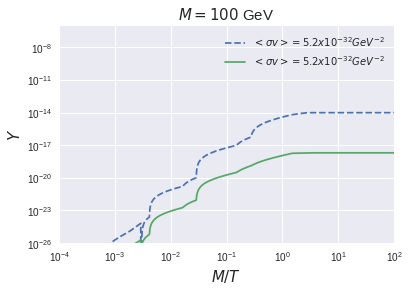

In [95]:
plt.loglog(x,yl3,'--', label = '$<σ v> = 5.2 x10^{-32} GeV^{-2}$' )
plt.loglog(x,yl33, label = '$<σ v> = 5.2 x10^{-32} GeV^{-2}$' )
#plt.loglog(x,yl11,'--', label = '$<σ v> = 8.52 x10^{-33}GeV^{-2}$')
#plt.loglog(x,Yeq(x), label = '$Y_{EQ}$')
plt.ylim(ymax=1e-6,ymin=1e-26)
plt.xlim(xmax=100,xmin=1e-4)
plt.xlabel('$M/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$M = 100$ GeV', size= 15)
plt.legend(loc=0)
plt.grid(True)